In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dreimac.toroidalcoords import ToroidalCoords
from dreimac.circularcoords import CircularCoords
from dreimac.utils import GeometryExamples, PlotUtils, CircleMapUtils

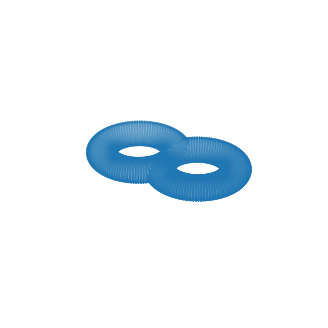

In [2]:
X = GeometryExamples.genus_two_surface()

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:,0], X[:,1], X[:,2], s=0.1)
PlotUtils.set_axes_equal(ax)
plt.axis("off")
plt.show()

In [3]:
# run toroidal coordinates algorithm with 4 most persistent classes
tc = ToroidalCoords(X, n_landmarks=1000)
cohomology_classes = [0,1,2,3]
toroidal_coords = tc.get_coordinates(cohomology_classes = cohomology_classes)

number of faces:  158617


In [4]:
# run circular coordinates algorithm with 4 most persistent classes
cc = CircularCoords(X, n_landmarks=1000)
circular_coords1 = cc.get_coordinates(cohomology_class = cohomology_classes[0])
circular_coords2 = cc.get_coordinates(cohomology_class = cohomology_classes[1])
circular_coords3 = cc.get_coordinates(cohomology_class = cohomology_classes[2])
circular_coords4 = cc.get_coordinates(cohomology_class = cohomology_classes[3])
circular_coords = [circular_coords1, circular_coords2, circular_coords3, circular_coords4]

number of faces:  3734209
number of faces:  3589459
number of faces:  409334
number of faces:  158539


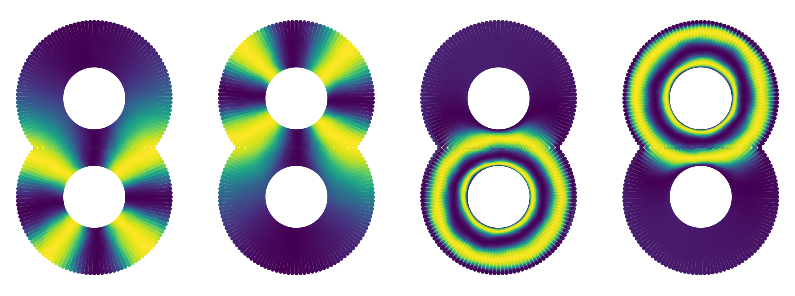

In [8]:
t_col1 = CircleMapUtils.levelset_coloring(CircleMapUtils.offset(toroidal_coords[0], 0.23 * (2 * np.pi)))
t_col2 = CircleMapUtils.levelset_coloring(CircleMapUtils.offset(toroidal_coords[1], 0.31 * (2 * np.pi)))
t_col3 = CircleMapUtils.levelset_coloring(CircleMapUtils.offset(toroidal_coords[2], 0.20 * (2 * np.pi)))
t_col4 = CircleMapUtils.levelset_coloring(CircleMapUtils.offset(toroidal_coords[3], 0.08 * (2 * np.pi)))

PlotUtils.plot_2d_scatter_with_different_colorings(X[:,[1,0]], [t_col1,t_col2,t_col3,t_col4])

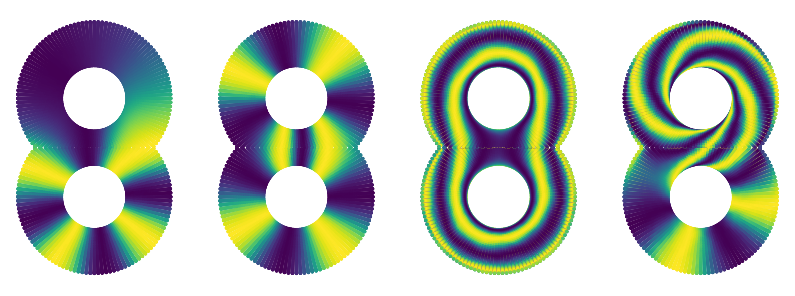

In [6]:
c_col1 = CircleMapUtils.levelset_coloring(circular_coords[0])
c_col2 = CircleMapUtils.levelset_coloring(circular_coords[1])
c_col3 = CircleMapUtils.levelset_coloring(circular_coords[2])
c_col4 = CircleMapUtils.levelset_coloring(circular_coords[3])

PlotUtils.plot_2d_scatter_with_different_colorings(X[:,[1,0]], [c_col1,c_col2,c_col3,c_col4])